In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
import bz2
%matplotlib inline

merged = pd.read_csv("./merged.txt" )

def rate(df, TU=0.2):
    
    
    
    df = df['orbit']
    
    timePerOrbit = 110*24.95
    print('timePerOrbit %2.1f ns '%timePerOrbit)

    timeUnit = TU*1e9 # desired time unit in seconds
    orbitsPerTimeUnit = timeUnit/timePerOrbit
    print('orbitsPerTimeUnit = %2.3f'%orbitsPerTimeUnit)

    orbitMin  = df[:1].values[0]
    orbitMax  = df[-1:].values[0] 
    rectime   = (orbitMax-orbitMin)*timePerOrbit # in ns
    print('orbitMin %d orbitMax %d'%(orbitMin, orbitMax))
    print('nOrbits %d '%(orbitMax - orbitMin))
    print('total recording time %2.4f ns (~= %2.1f s)' %(rectime, rectime*1.e-9))

    bins=int((orbitMax-orbitMin)/orbitsPerTimeUnit) 
    print("bins = %d" %bins)
    timePerBin = rectime/bins
    
    muons=np.zeros(bins)
    sclice=np.array([orbitMin+ ((orbitMax-orbitMin)/bins)*i for i in range(bins+1)])

    # Count the events in the first orbit = orbitMin
    for orbit in df:
        if(orbit > orbitMin): break
        if(orbit == orbitMin): muons[0] += 1

    df = df[int(muons[0]):] # We already counted the first orbit
    i = 0
    for orbit in df:
        while not (orbit > sclice[i] and orbit <= sclice[i + 1]) and i < bins-1: # Note the <= in 'orbit <= slicePlusOne[i]'. 
            i = i + 1                                                              # It is needed to capture the last orbit.
        muons[i] += 1
        
    # Maximum Likelihood Estimation of Poisson parameter
    Nmuons = int(muons.sum()) 
    Ninterval = len(muons) # How many time intervals

    mu = muons.mean()
    med = np.median(muons)
    sigma = muons.std()
    MLE = Nmuons/Ninterval
    print("Maximum Likelihood Estimate for Poisson parameter λ: \nMLE = {}" .format(MLE))
    
    # 99% Confidence interval under gaussian approximation

    error = 2.58 * np.sqrt(MLE/Ninterval)
    lower = MLE-error
    upper = MLE+error

    print("99% CI = [{},{} ]" .format(lower, upper))
    
    
    plt.figure(figsize=(8,8))

    muons = pd.Series(muons)
    counts = muons.value_counts().sort_index()
    
    plt.errorbar([i for i in range(len(counts))], counts, yerr = np.sqrt(counts), fmt = 'o')
    plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9), fontsize = 20) # latex can be entered in the label's string
    plt.ylabel('Frequency', fontsize = 20)
    
    print('--------------------------------')
    print('mean = {:.2f}' .format(mu))
    print('median = {:d}'.format(int(med)))
    print('sample std = {:.2f}'.format( sigma))
    print('Gaussian 99% Confidence Interval = [{:.2f} , {:.2f} ]'.format(lower, upper))
    plt.show()
    
    return (muons, TU)





# Unfiltered Rate

timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019
orbitMin 1 orbitMax 3851535892
nOrbits 3851535891 
total recording time 10570540252849.5000 ns (~= 10570.5 s)
bins = 52852
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 39.903636570044654
99% CI = [39.832744896155596,39.97452824393371 ]
--------------------------------
mean = 39.90
median = 39
sample std = 8.42
Gaussian 99% Confidence Interval = [39.83 , 39.97 ]


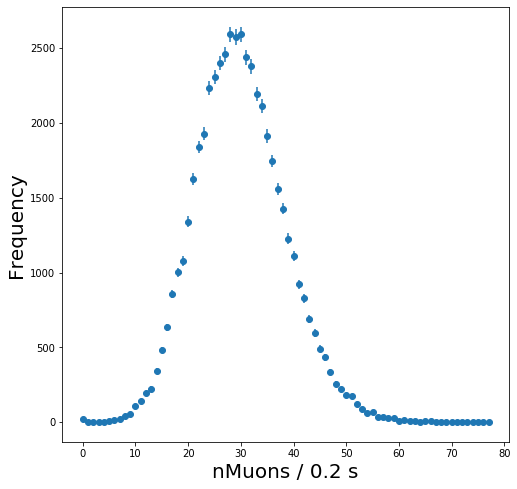

In [20]:
muons, TU = rate(merged, TU = 0.2)

In [21]:
np.savetxt('muons_{}.txt'.format(TU), muons, fmt =' %d ') # so that someone else can intstant access to the data without running this code

# Unfiltered Charged Rates

POSITIVE CHARGE
timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019
orbitMin 1 orbitMax 3851529830
nOrbits 3851529829 
total recording time 10570523615690.5000 ns (~= 10570.5 s)
bins = 52852
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 20.44747597063498
99% CI = [20.396729149086454,20.498222792183505 ]
--------------------------------
mean = 20.45
median = 20
sample std = 5.18
Gaussian 99% Confidence Interval = [20.40 , 20.50 ]


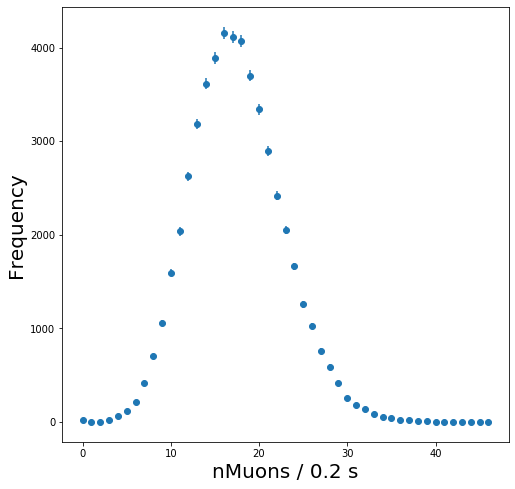






NEGATIVE CHARGE
timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019
orbitMin 5303 orbitMax 3851535892
nOrbits 3851530589 
total recording time 10570525701510.5000 ns (~= 10570.5 s)
bins = 52852
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 19.45616059940967
99% CI = [19.4066591900407,19.505662008778643 ]
--------------------------------
mean = 19.46
median = 19
sample std = 5.01
Gaussian 99% Confidence Interval = [19.41 , 19.51 ]


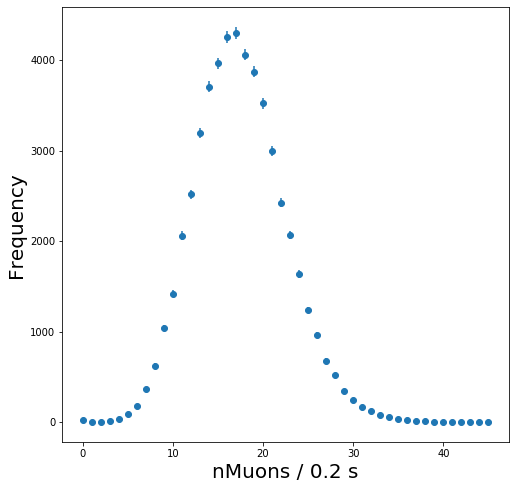

In [3]:
chPlus = merged[merged['charge'] == 1]
chMinus = merged[merged['charge'] == -1]

print('POSITIVE CHARGE')

muons_plus, tup = rate(chPlus)
print(4*'\n')
print('NEGATIVE CHARGE')

muons_minus, tum = rate(chMinus)


# Two Leg Muon Rate

timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019
orbitMin 41208 orbitMax 3851529830
nOrbits 3851488622 
total recording time 10570410523079.0000 ns (~= 10570.4 s)
bins = 52852
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 3.205630818133656
99% CI = [3.185537773677558,3.225723862589754 ]
--------------------------------
mean = 3.21
median = 3
sample std = 1.82
Gaussian 99% Confidence Interval = [3.19 , 3.23 ]


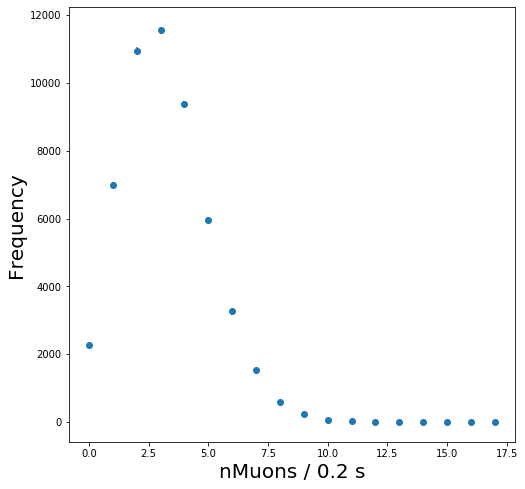

In [4]:
twoleg = pd.read_csv("./twoleg.txt" )

twoleg_muons, tu_tl = rate(twoleg)